#Week 6: Dynamic Programming 2

Integrantes:

- Juan Diego Castañeda Oviedo
- Sebastian Camilo Casas Rojas
- Daniel Santiago Gaitan Gaitan

##6-1: Maximum Amount of Gold

In [ ]:
%%writefile ex6_1.py

W, n = list(map(int, input().split()))
w = list(map(int, input().split()))

value = [[0]*(len(w)+1) for _ in range(W+1)]

for i in range(1,len(w)+1):
    for j in range(1,W+1):
        value[j][i] = value[j][i-1]
        if w[i-1] <= j:
            val = value[j-w[i-1]][i-1] + w[i-1]
            if val >= value[j][i]:
                value[j][i] = val

print(value[W][len(w)])

Writing ex6_1.py


In [ ]:
!python ex6_1.py

10 3
1 4 8
9


##6-2: Partitioning Souvenirs

In [ ]:
%%writefile ex6_2.py

import numpy

n = int(input())
iw = list(map(int, input().split()))
tw = sum(iw)

if n<3: 
    print('0')

elif tw % 3 != 0:
    print('0')

else:

    W = tw//3

    count = 0 
    value = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            value[i][j] = value[i][j-1]
            if iw[j-1]<=i:
                temp = value[i-iw[j-1]][j-1] + iw[j-1]
                if temp > value[i][j]:
                    value[i][j] = temp
            if value[i][j] == W:
                count += 1

    if count < 3:
        print('0')
    else:
        print('1')

Writing ex6_2.py


In [ ]:
!python ex6_2.py

4
3 3 3 3
0


In [ ]:
!python ex6_2.py

1
40
0


In [ ]:
!python ex6_2.py

11
17 59 34 57 17 23 67 1 18 2 59
1


In [ ]:
!python ex6_2.py

13
1 2 3 4 5 5 7 7 8 10 12 19 25
1


##6-3: Maximum Value of an Arithmetic Expression

In [ ]:
%%writefile ex6_3.py

import math

def calculate(a, b, c):

    if c == '+':
        return a + b
    elif c == '-':
        return a - b
    else:
        return a * b


def Min_Max(M, m, i, j, operators):

    min_value = math.inf
    max_value = -math.inf

    for k in range(i, j):
        a = calculate(M[i][k], M[k+1][j], operators[k])
        b = calculate(M[i][k], m[k+1][j], operators[k])
        c = calculate(m[i][k], M[k+1][j], operators[k])
        d = calculate(m[i][k], m[k+1][j], operators[k])
        min_value = min(min_value, a, b, c, d)
        max_value = max(max_value, a, b, c, d)
        
    return [min_value, max_value]


exp = input()
operators = []
operands = []

for i in exp:
    if i in ['+', '-', '*']:
        operators.append(i)
    else:
        operands.append(int(i))

n = len(operands)
m = [[None for x in range(n)] for x in range(n)]
M = [[None for x in range(n)] for x in range(n)]

for i in range(n):
    m[i][i] = operands[i]
    M[i][i] = operands[i]

for s in range(1, n):
    for i in range(0, n-s):
        j = i + s
        res = Min_Max(M, m, i, j, operators)
        m[i][j] = res[0]
        M[i][j] = res[1]

print(M[0][n-1])

Writing ex6_3.py


In [ ]:
!python ex6_3.py

1+5
6


In [ ]:
!python ex6_3.py

5-8+7*4-8+9
200


##Results:

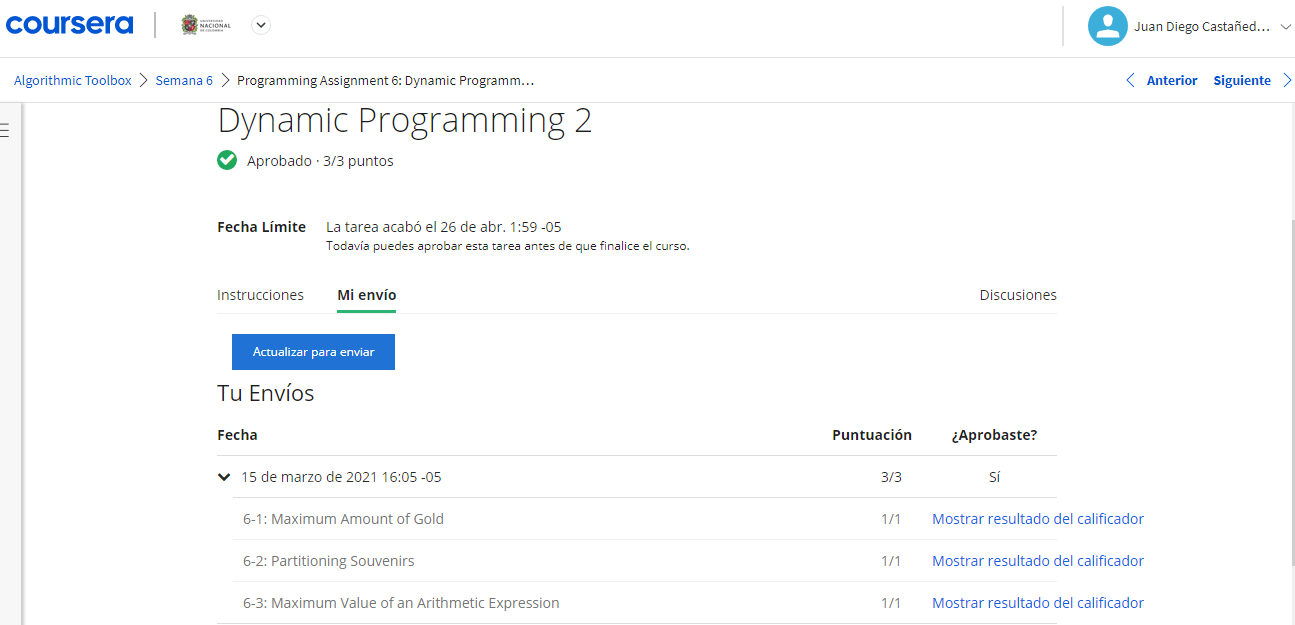